Usa numpy 1.24.3
    pandas 2.1.1
    sklearn 1.6.1

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time
import re
import json

In [19]:
countries = [
    "Argentina",
    "Bolivia",
    "Chile",
    "Colombia",
    "Costa Rica",
    "Cuba",
    "Ecuador",
    "El Salvador",
    "Guatemala",
    "Honduras",
    "Mexico",
    "Nicaragua",
    "Panama",
    "Paraguay",
    "Peru",
    "Puerto Rico",
    "Dominican Republic",
    "Uruguay",
    "Venezuela",
    "Spain"
]
print(len(countries))  # 20

20


In [20]:
def correlation(data):
    sigma = data.std(axis=0)
    c = np.zeros((data.shape[1], data.shape[1]))
    
    for row in range(data.shape[1]):
        for col in range(row,data.shape[1]):
            if col == row:
                c[row, col] = 1.0
            else:
                cov = np.cov(data.iloc[:, row], data.iloc[:, col])[0][1]
                c[row, col] = cov / (sigma[row] * sigma[col])
                c[col, row] = c[row, col]
    return c

In [21]:
d = pd.DataFrame(np.array([[25,50,4],
                           [30,60,5],
                           [22,55,3],
                           [35,65,5],
                           [28,48,2],
                           [45,75,3],
                           [50,80,6],
                           [34,58,4],
                           [40,70,2],
                           [24,52,3]
                           ]))
correlation(d)

array([[1.        , 0.93886362, 0.33688942],
       [0.93886362, 1.        , 0.38778648],
       [0.33688942, 0.38778648, 1.        ]])

# Indices

In [22]:
path = "./datasets/CPI2024-Results-and-trends.csv"
df = pd.read_csv(path, header=2, encoding="ISO-8859-1", sep=';')
df = df[df["Country / Territory"].isin(countries)]
df.dropna(how="all", axis=1, inplace=True)
df.rename(columns={"Country / Territory": "country"}, inplace=True)
df.set_index('country', inplace=True)

cpi2024_sources = {
    "rank": "Rank",
    "cpi": "CPI 2024 score",
    "gi": "S&P / Global Insights Country Risk Ratings",
    "prs": "PRS International Country Risk Guide",
    "vdem": "Varieties of Democracy Project",
    "wef": "World Economic Forum EOS",
    "wjp": "World Justice Project Rule of Law Index",
    "bti": "Bertelsmann Foundation Transformation Index",
    "eiu": "Economist Intelligence Unit Country Ratings"
}
df.rename(columns=dict(zip(cpi2024_sources.values(), cpi2024_sources.keys())), inplace=True)

df.drop(columns=[i for i in df.columns if i not in cpi2024_sources.keys()], inplace=True)
df = df.reindex(countries)
df.dropna(how='all', inplace=True)
df

,cpi,rank,bti,eiu,gi,prs,vdem,wef,wjp
country,,,,,,,,,
Argentina,37.0,99.0,51.0,51.0,32.0,33.0,48.0,18.0,44.0
Bolivia,28.0,133.0,39.0,35.0,32.0,33.0,34.0,6.0,18.0
Chile,63.0,32.0,82.0,67.0,59.0,60.0,70.0,58.0,64.0
Colombia,39.0,92.0,47.0,51.0,46.0,33.0,48.0,29.0,38.0
Costa Rica,58.0,42.0,73.0,67.0,59.0,42.0,62.0,43.0,60.0
Cuba,41.0,82.0,39.0,51.0,32.0,49.0,35.0,NaN,NaN
Ecuador,32.0,121.0,47.0,35.0,32.0,33.0,30.0,17.0,30.0
El Salvador,30.0,130.0,30.0,35.0,32.0,33.0,27.0,23.0,31.0
Guatemala,25.0,146.0,17.0,18.0,32.0,28.0,22.0,29.0,27.0


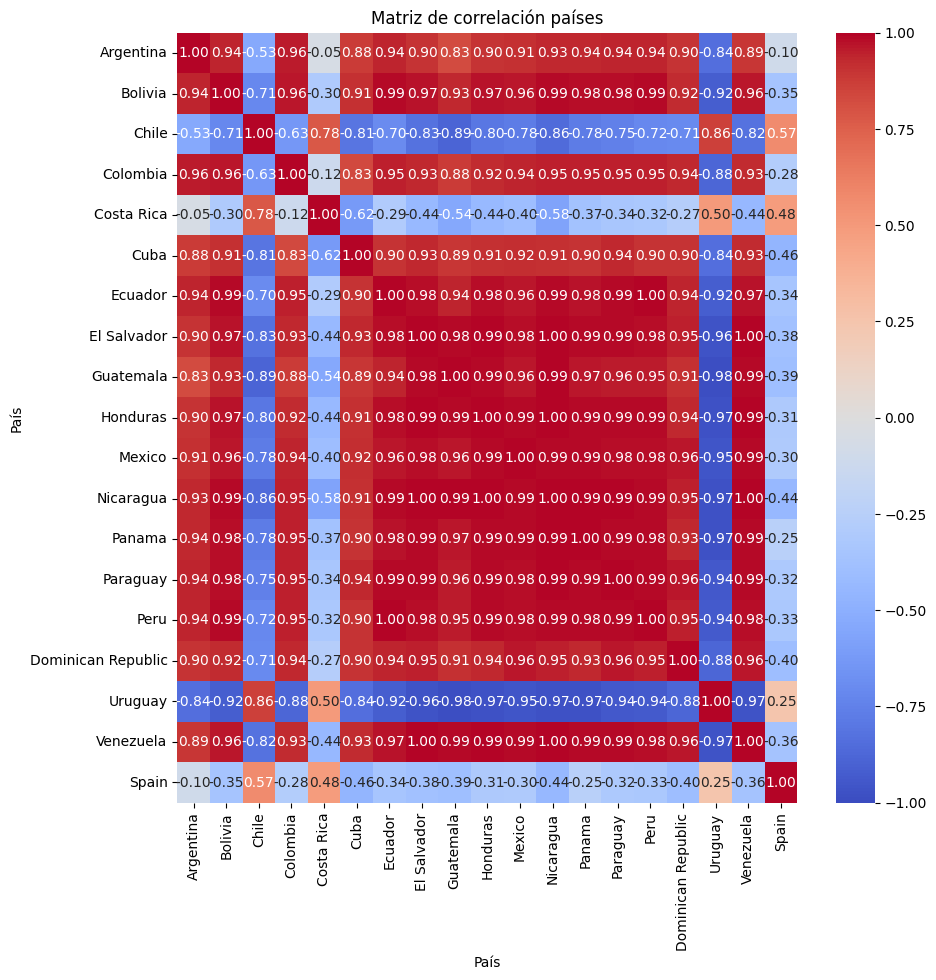

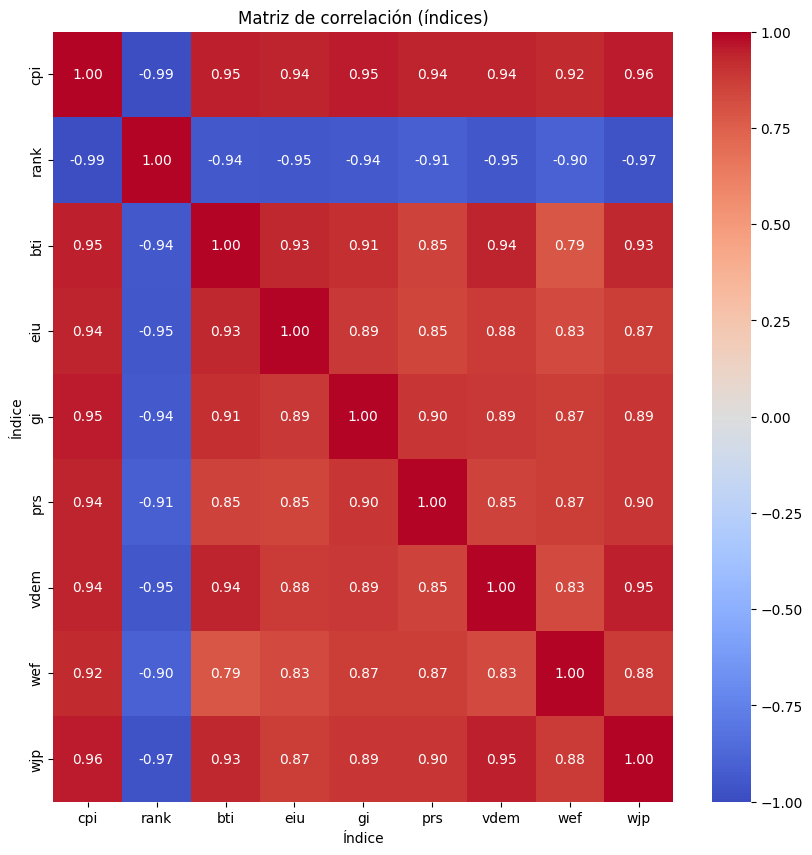

In [23]:
corr = df.T.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
#sns.heatmap(np.abs(corr), annot=True, cmap="coolwarm", vmin=0, vmax=1, fmt=".1f")
plt.title("Matriz de correlación países")
plt.xlabel("País")
plt.ylabel("País")
plt.show()

#corrT = correlation(df.T)

corrT = df.corr()

plt.figure(figsize=(10,10))
#sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
sns.heatmap(corrT, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Matriz de correlación (índices)")
plt.xlabel("Índice")
plt.ylabel("Índice")
plt.show()

In [24]:
type(corr)

pandas.core.frame.DataFrame

# Busquedas

In [25]:
# Leer el archivo JSON guardado
Nombre_Archivo = f"../buscador/resultados/resultados_corrupcion.json"

with open(Nombre_Archivo, "r") as file:
    resultados = json.load(file)

# Leer el archivo JSON guardado
Nombre_Archivo = f"../buscador/resultados/res_unicos_corrupcion.json"

with open(Nombre_Archivo, "r") as file:
    all_hrefs = json.load(file)

## Correlacion

In [26]:
import pandas as pd
from math import isnan
from scipy.stats import kendalltau, spearmanr, pearsonr

def get_common(results, top):
    common = set(u['href'] for u in results[0]['search_results']['results'][:top])
    for c in results[1:]:
        common.intersection_update(u['href'] for u in c['search_results']['results'][:top])
    return common

def build_aligned_ranks(rank_list, universe, top, absent_policy="max_plus_one"):
    """
    rank_list: lista de dicts con clave 'href', en orden de ranking.
    universe: lista/iterable con todos los hrefs a alinear.
    top: entero, cuántos tomas de rank_list.
    absent_policy:
      - 'max_plus_one': rank = len(universe) + 1 a los ausentes
      - '1.5top': rank = int(1.5 * top) a los ausentes
    """
    pos = {item['href']: i+1 for i, item in enumerate(rank_list)}  # 1..len(list)
    if absent_policy == "max_plus_one":
        absent_rank = len(universe) + 1
    elif absent_policy == "1.5top":
        absent_rank = int(1.5 * top)
    else:
        absent_rank = len(universe) + 1
    return [pos.get(u, absent_rank) for u in universe]

def correlation_matrix(results, universe, top, method="spearman", absent_policy="max_plus_one", only_common=False, common_by_order=False):
    """
    results: lista de dicts con llaves ["country"] y ["search_results"]["results"]
    method: "spearman" (rho) o "kendall" (tau-b)
    absent_policy:
      - 'max_plus_one': rank = len(universe) + 1 a los ausentes
      - '1.5top': rank = int(1.5 * top) a los ausentes
    only_common: si True, solo usa los resultados comunes a todos los países
    common_by_order: si True y only_common es True, alinea los rankings según el orden común,
                  si False (default), usa las posiciones de los elementos comunes en el ranking original
    """
    
    countries = [c["country"] for c in results]

    if only_common:
        common_universe = [u for u in universe if u in get_common(results, top)]
        aligned = {}
        for i in common_universe:
            print(i)
        if common_by_order:
            for c in results:
                common = [r for r in c["search_results"]["results"][:top] if r["href"] in common_universe]
                if (c["country"]=='Bolivia') or c["country"]=='Spain':
                    print("Common for {}:".format(c["country"]))
                    for r in common:
                        print("\t{}".format(r['href']))
                aligned[c["country"]] = build_aligned_ranks(
                        common, common_universe, top, absent_policy=absent_policy
                    )
        else:
            for c in results:
                top_list = c['search_results']['results'][:top]
                pos = {item['href']: i+1 for i, item in enumerate(top_list)}  # 1..len(list)
                aligned[c["country"]] = [pos[u] for u in common_universe]

    else:
        aligned = {
            c["country"]: build_aligned_ranks(
                c["search_results"]["results"][:top], universe, top, absent_policy=absent_policy
            )
            for c in results
        }

    corr_data, pval_data = [], []
    for c1 in countries:
        row_corr, row_p = [], []
        x = aligned[c1]
        for c2 in countries:
            y = aligned[c2]
            if method == "spearman":
                r, p = spearmanr(x, y)
            elif method == "kendall":
                r, p = kendalltau(x, y)
            else:
                raise ValueError("method debe ser 'spearman' o 'kendall'")
            row_corr.append(0.0 if (r is None or isnan(r)) else float(r))
            row_p.append(1.0 if (p is None or isnan(p)) else float(p))
        corr_data.append(row_corr)
        pval_data.append(row_p)

    corr_df = pd.DataFrame(corr_data, index=countries, columns=countries)
    p_df    = pd.DataFrame(pval_data, index=countries, columns=countries)
    return corr_df, p_df, aligned


https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
https://es.wikipedia.org/wiki/Corrupci%C3%B3n_pol%C3%ADtica
https://www.interpol.int/es/Delitos/Corrupcion
https://dle.rae.es/corrupci%C3%B3n
https://www.unodc.org/newsletter/es/200601/page004.html
Common for Bolivia:
	https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
	https://www.interpol.int/es/Delitos/Corrupcion
	https://www.unodc.org/newsletter/es/200601/page004.html
	https://es.wikipedia.org/wiki/Corrupci%C3%B3n_pol%C3%ADtica
	https://dle.rae.es/corrupci%C3%B3n
Common for Spain:
	https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
	https://dle.rae.es/corrupci%C3%B3n
	https://es.wikip

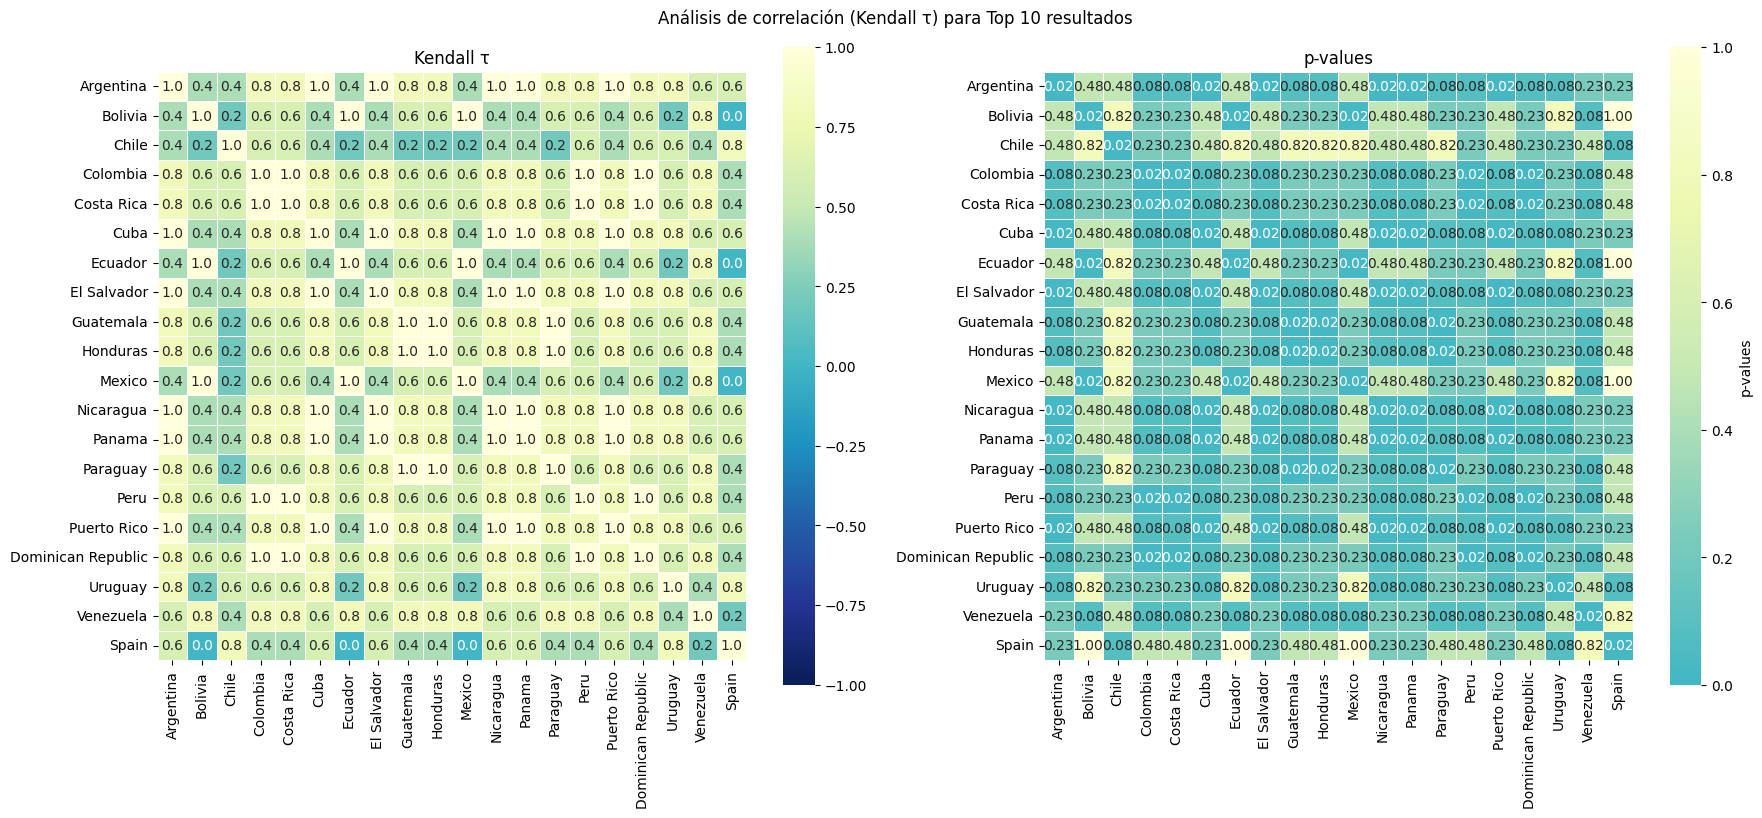

https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
https://es.wikipedia.org/wiki/Corrupci%C3%B3n_pol%C3%ADtica
https://www.interpol.int/es/Delitos/Corrupcion
https://dle.rae.es/corrupci%C3%B3n
https://www.unodc.org/newsletter/es/200601/page004.html
Common for Bolivia:
	https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
	https://www.interpol.int/es/Delitos/Corrupcion
	https://www.unodc.org/newsletter/es/200601/page004.html
	https://es.wikipedia.org/wiki/Corrupci%C3%B3n_pol%C3%ADtica
	https://dle.rae.es/corrupci%C3%B3n
Common for Spain:
	https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
	https://dle.rae.es/corrupci%C3%B3n
	https://es.wikip

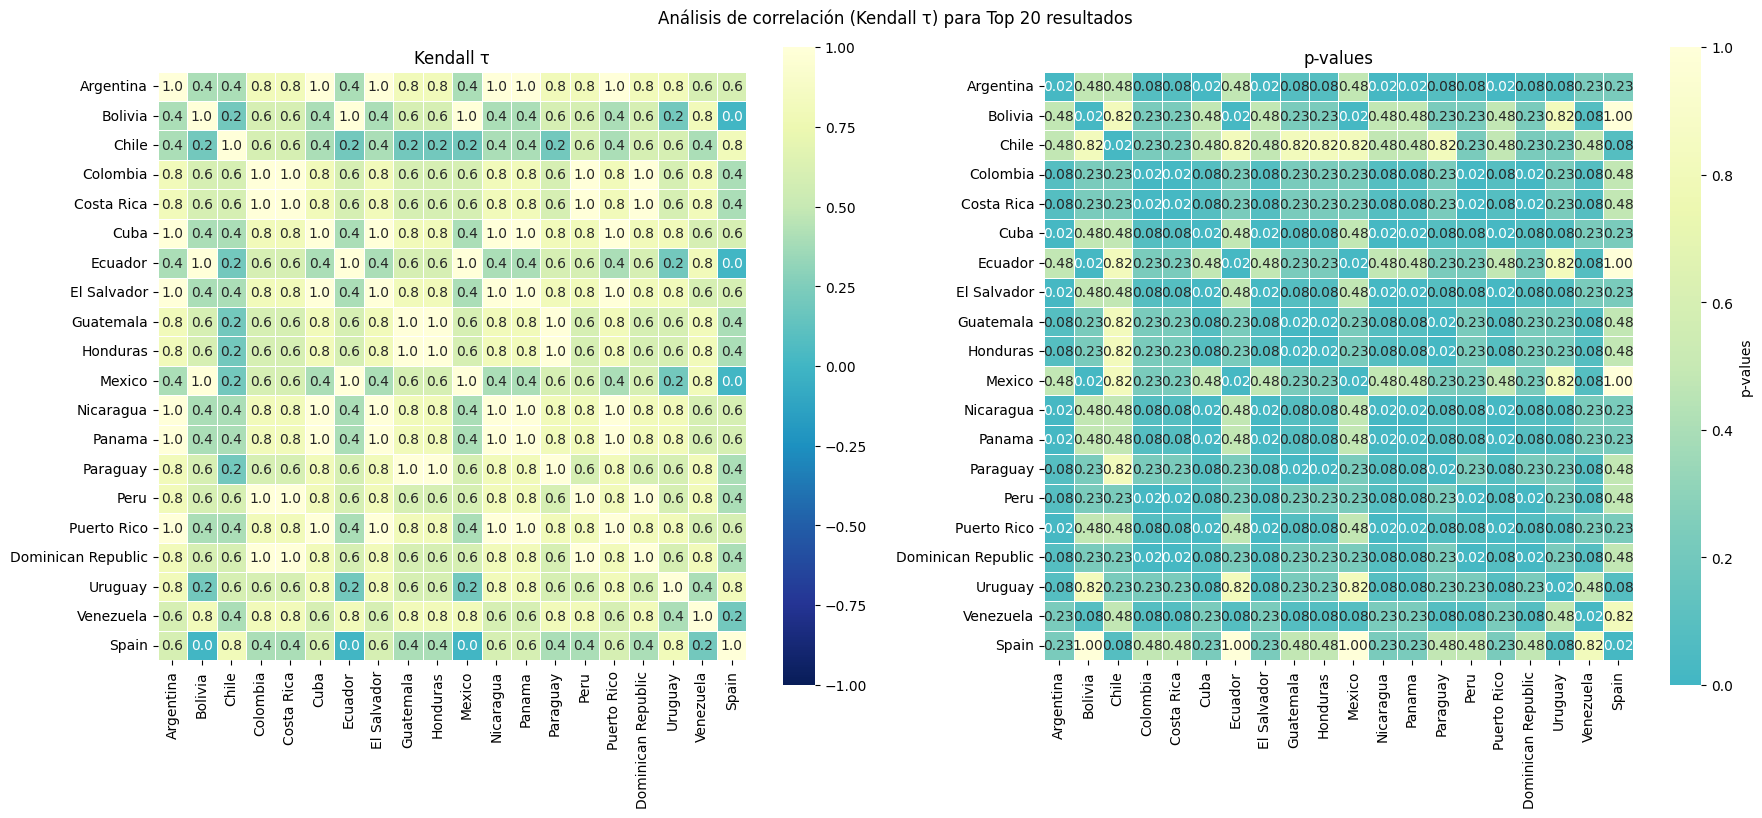

https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
https://es.wikipedia.org/wiki/Corrupci%C3%B3n_pol%C3%ADtica
https://www.interpol.int/es/Delitos/Corrupcion
https://dle.rae.es/corrupci%C3%B3n
https://www.unodc.org/newsletter/es/200601/page004.html
https://dpej.rae.es/lema/corrupci%C3%B3n
Common for Bolivia:
	https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
	https://www.interpol.int/es/Delitos/Corrupcion
	https://www.unodc.org/newsletter/es/200601/page004.html
	https://es.wikipedia.org/wiki/Corrupci%C3%B3n_pol%C3%ADtica
	https://dle.rae.es/corrupci%C3%B3n
	https://dpej.rae.es/lema/corrupci%C3%B3n
Common for Spain:
	https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20s

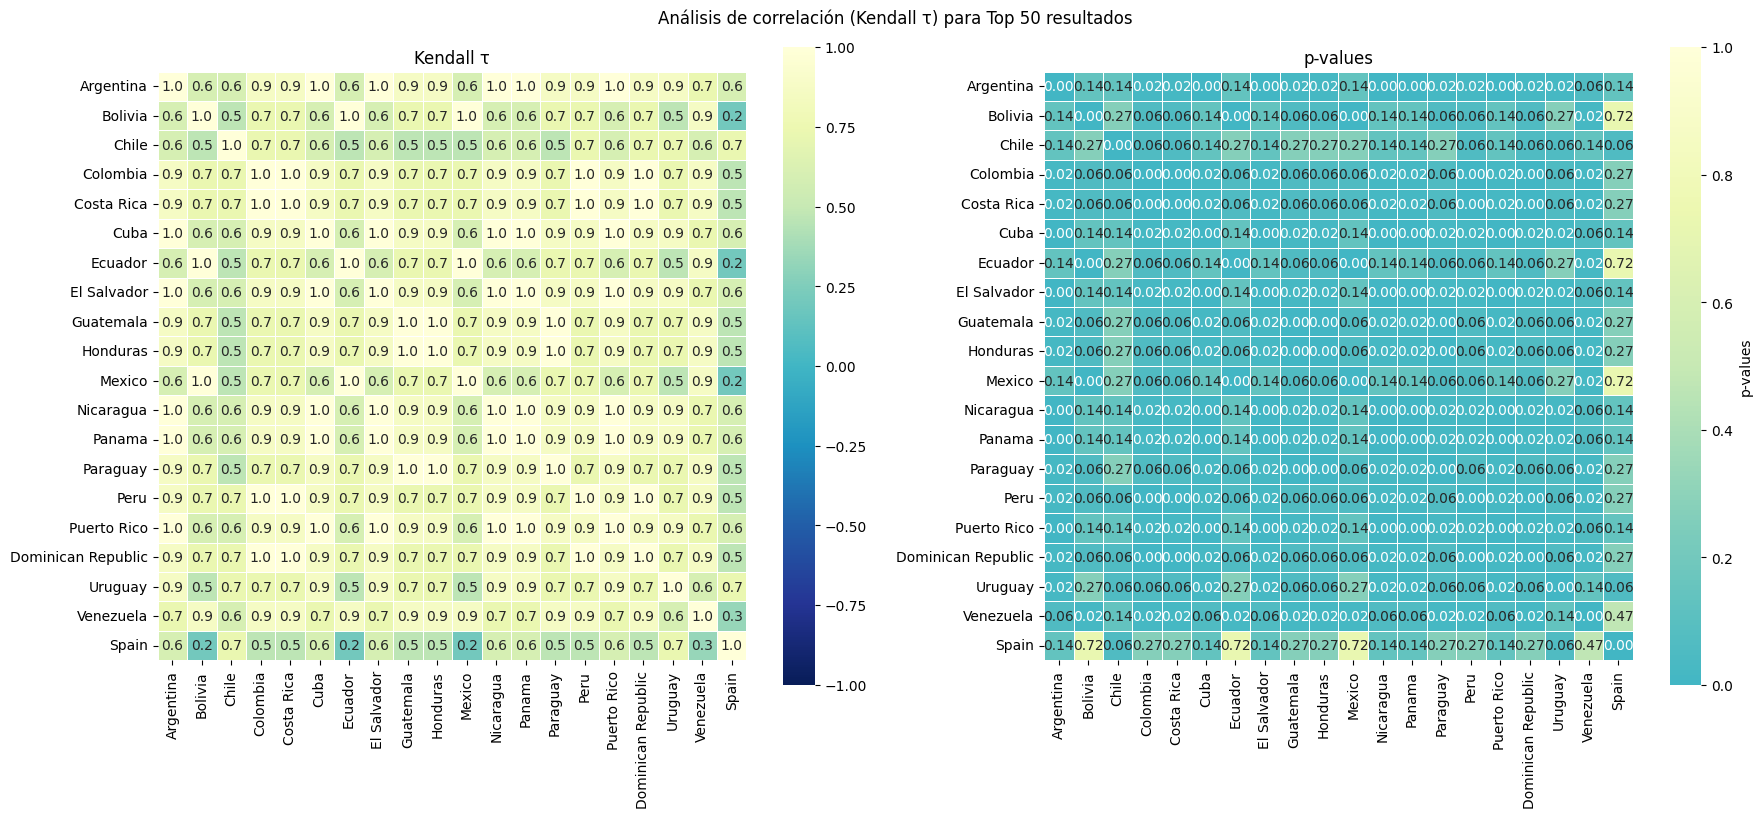

https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
https://es.wikipedia.org/wiki/Corrupci%C3%B3n_pol%C3%ADtica
https://www.interpol.int/es/Delitos/Corrupcion
https://dle.rae.es/corrupci%C3%B3n
https://www.unodc.org/newsletter/es/200601/page004.html
https://www.youtube.com/watch?v=Be3q1GSMhf8
https://www.ohchr.org/es/good-governance/corruption-and-human-rights
https://dpej.rae.es/lema/corrupci%C3%B3n
https://elpais.com/noticias/corrupcion/
https://publications.iadb.org/publications/spanish/document/Corrupci%C3%B3n-normal-y-corrupci%C3%B3n-sist%C3%A9mica.pdf
https://cnc.gob.gt/
https://www.unir.net/revista/derecho/que-es-corrupcion/
Common for Bolivia:
	https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
	https://www.interpol.int/es/Delitos/Corrupcion
	http

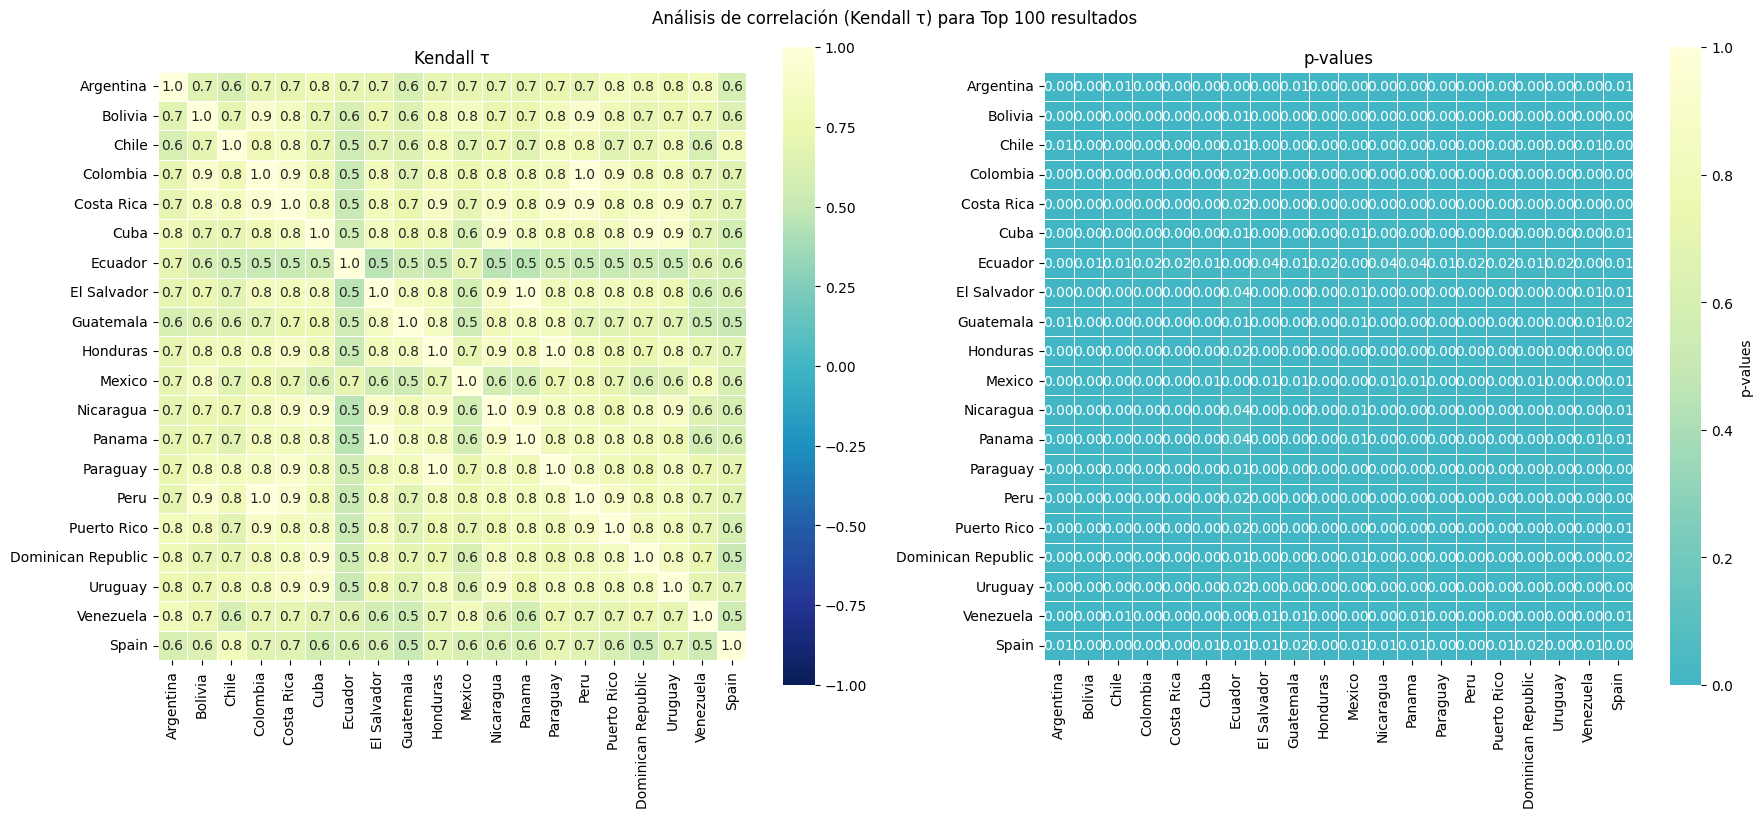

In [27]:
method = "kendall"  # "spearman" o "kendall"

for top in [10, 20, 50, 100]:
    rho, p, _ = correlation_matrix(resultados, all_hrefs, top, method=method, absent_policy="1.5top", only_common=True, common_by_order=True)

    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    method_dict = {"spearman": "Spearman ρ", "kendall": "Kendall τ"}
    cbar_kws={"label": method_dict[method]}

    # Heatmap method
    sns.heatmap(
        rho, annot=True, cmap="YlGnBu_r", center=0,
        fmt=".1f", vmin=-1, vmax=1, linewidths=0.5, square=True,
        **cbar_kws, ax=axes[0]
    )

    axes[0].set_title(method_dict[method])

    # Heatmap p-values
    sns.heatmap(
        p, annot=True, cmap="YlGnBu_r", center=0,
        fmt=".2f", vmin=0, vmax=1, linewidths=0.5, square=True,
        cbar_kws={"label": "p-values"}, ax=axes[1]
    )
    axes[1].set_title("p-values")

    plt.suptitle(f"Análisis de correlación ({method_dict[method]}) para Top {top} resultados")
    plt.tight_layout()
    plt.show()


# Indices-BusquedasCorr-BusquedasTras-Aleatoria-Distancia-Desglosado
## Matriz distancia entre capitales

In [28]:
import math
# Coordenadas (lat, lon) de capitales (aprox)
capital_coords = {
    "Argentina": (-34.6037, -58.3816),            # Buenos Aires
    "Bolivia": (-16.4897, -68.1193),              # La Paz (sede de gobierno)
    "Chile": (-33.4489, -70.6693),                 # Santiago
    "Colombia": (4.7110, -74.0721),                # Bogotá
    "Costa Rica": (9.9281, -84.0907),              # San José
    "Cuba": (23.1136, -82.3666),                   # La Habana
    "Ecuador": (-0.1807, -78.4678),                # Quito
    "El Salvador": (13.6929, -89.2182),            # San Salvador
    "Guatemala": (14.6349, -90.5061),              # Ciudad de Guatemala
    "Honduras": (14.0723, -87.1921),               # Tegucigalpa
    "Mexico": (19.4326, -99.1332),                 # Ciudad de México
    "Nicaragua": (12.1140, -86.2362),              # Managua
    "Panama": (8.9824, -79.5199),                  # Ciudad de Panamá
    "Paraguay": (-25.2637, -57.5759),              # Asunción
    "Peru": (-12.0464, -77.0428),                  # Lima
    "Puerto Rico": (18.4655, -66.1057),            # San Juan
    "Dominican Republic": (18.4861, -69.9312),     # Santo Domingo
    "Uruguay": (-34.9011, -56.1645),               # Montevideo
    "Venezuela": (10.4806, -66.9036),              # Caracas
    "Spain": (40.4168, -3.7038)                    # Madrid
}

# Función Haversine (km)
def haversine_km(coord1, coord2):
    R = 6371.0088  # radio medio de la Tierra en km
    lat1, lon1 = map(math.radians, coord1)
    lat2, lon2 = map(math.radians, coord2)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = (math.sin(dlat/2)**2
         + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2)
    c = 2 * math.asin(math.sqrt(a))
    return R * c

# Construir la matriz (en el mismo orden que countries)
n = len(countries)
D = np.zeros((n, n), dtype=float)

for i, ci in enumerate(countries):
    for j, cj in enumerate(countries):
        if i == j:
            D[i, j] = 0.0
        else:
            D[i, j] = haversine_km(capital_coords[ci], capital_coords[cj])

# DataFrame cuadrado país x país (normalizado 0..1)
dist_matrix = pd.DataFrame(D/D.max(), index=countries, columns=countries)
dist_matrix

,Argentina,Bolivia,Chile,Colombia,Costa Rica,Cuba,Ecuador,El Salvador,Guatemala,Honduras,Mexico,Nicaragua,Panama,Paraguay,Peru,Puerto Rico,Dominican Republic,Uruguay,Venezuela,Spain
Argentina,0.000000,0.208884,0.106421,0.436413,0.527375,0.644683,0.407404,0.586834,0.601879,0.580192,0.690724,0.557697,0.498319,0.097313,0.293159,0.556649,0.563288,0.019177,0.475894,0.938599
Bolivia,0.208884,0.000000,0.177817,0.228609,0.319833,0.436198,0.199874,0.381119,0.396643,0.373023,0.489514,0.350660,0.289447,0.136945,0.100993,0.363769,0.363872,0.221200,0.280501,0.856755
Chile,0.106421,0.177817,0.000000,0.397893,0.469823,0.598986,0.353945,0.523156,0.536891,0.520194,0.617647,0.497864,0.449454,0.145706,0.230461,0.541288,0.539656,0.125480,0.457947,1.000000
Colombia,0.436413,0.228609,0.397893,0.000000,0.116575,0.208529,0.068297,0.181062,0.197184,0.165838,0.296273,0.146708,0.071599,0.353145,0.176794,0.164200,0.149168,0.447272,0.095074,0.748609
Costa Rica,0.527375,0.319833,0.469823,0.116575,0.000000,0.138064,0.120046,0.065178,0.081429,0.053357,0.180385,0.031536,0.047864,0.453559,0.239630,0.201489,0.167913,0.540678,0.175822,0.792649
Cuba,0.644683,0.436198,0.598986,0.208529,0.138064,0.000000,0.245213,0.118866,0.118942,0.105244,0.166666,0.120515,0.149533,0.561219,0.369306,0.165045,0.129930,0.655775,0.201867,0.695206
Ecuador,0.407404,0.199874,0.353945,0.068297,0.120046,0.245213,0.000000,0.181711,0.197489,0.173156,0.293000,0.150787,0.095825,0.334509,0.124158,0.231212,0.212627,0.420632,0.162935,0.816429
El Salvador,0.586834,0.381119,0.523156,0.181062,0.065178,0.118866,0.181711,0.000000,0.016252,0.020813,0.115301,0.034367,0.110225,0.516219,0.295380,0.235813,0.198743,0.600858,0.229057,0.808345
Guatemala,0.601879,0.396643,0.536891,0.197184,0.081429,0.118942,0.197489,0.016252,0.000000,0.033866,0.099113,0.050483,0.126174,0.531976,0.309924,0.246049,0.208640,0.616056,0.243085,0.812255
Honduras,0.580192,0.373023,0.520194,0.165838,0.053357,0.105244,0.173156,0.020813,0.033866,0.000000,0.131143,0.022529,0.094300,0.506916,0.290804,0.215056,0.178053,0.593690,0.209245,0.789968


## Traslape

In [29]:
def graph_heatmap(resultados, tops, show=True, only_common=False):
    import matplotlib.pyplot as plt
    import seaborn as sns
    # Crear matriz de coincidencias de href
    coincidencias = {}
    for pais in resultados:
        coincidencias[pais["country"]] = {}
        for pais2 in resultados:
            coincidencias[pais["country"]][pais2["country"]] = 0

    if only_common:
        common = get_common(resultados, tops[-1])
        for i in range(len(tops)-1):
            for pais in resultados:
                for pais2 in resultados:
                    for result in pais["search_results"]["results"][tops[i]:tops[i+1]]:
                        for result2 in pais2["search_results"]["results"][tops[i]:tops[i+1]]:
                            if (result["href"] == result2["href"]) and (result["href"] in common):
                                coincidencias[pais["country"]][pais2["country"]] += 1
            # Crear matriz de coincidencias
            matriz = []
            for pais in coincidencias:
                matriz.append([coincidencias[pais][pais2] for pais2 in coincidencias])

            if show:
                # Crear heatmap
                plt.figure(figsize=(10, 10))
                sns.heatmap(matriz, annot=True, fmt="d", xticklabels=coincidencias.keys(), yticklabels=coincidencias.keys(), vmin=0, vmax=tops[i+1], cmap="YlGnBu_r")
                plt.title("Matriz de coincidencias de resultados de búsqueda de 'Corrupción' (Top {})".format(tops[i+1]))

                # Guardar heatmap
                # plt.savefig("Coincidencias/heatmap_violencia.png")

                plt.show()
        else:    
            for i in range(len(tops)-1):
                for pais in resultados:
                    for pais2 in resultados:
                        for result in pais["search_results"]["results"][tops[i]:tops[i+1]]:
                            for result2 in pais2["search_results"]["results"][tops[i]:tops[i+1]]:
                                if result["href"] == result2["href"]:
                                    coincidencias[pais["country"]][pais2["country"]] += 1

                # Crear matriz de coincidencias
                matriz = []
                for pais in coincidencias:
                    matriz.append([coincidencias[pais][pais2] for pais2 in coincidencias])
                
                if show:
                    # Crear heatmap
                    plt.figure(figsize=(10, 10))
                    sns.heatmap(matriz, annot=True, fmt="d", xticklabels=coincidencias.keys(), yticklabels=coincidencias.keys(), vmin=0, vmax=tops[i+1], cmap="YlGnBu_r")
                    plt.title("Matriz de coincidencias de resultados de búsqueda de 'Corrupción' (Top {})".format(tops[i+1]))

                    # Guardar heatmap
                    # plt.savefig("Coincidencias/heatmap_violencia.png")

                    plt.show()

        return pd.DataFrame(np.array(matriz), index=coincidencias.keys(), columns=coincidencias.keys())

# Desglose de indices

In [30]:
df_desglosado = pd.read_csv("./datasets/latam_desglosado_full.csv", index_col=0)
corrDesglosado = df_desglosado.T.corr()
df_desglosado

,cpi,rank,bti_3,bti_15,eiu,gi,prs,vdem,wef,wjp_1,wjp_2,wjp_3,wjp_4
Argentina,37.0,99.0,8.0,70.0,51.0,32.0,33.0,48.0,18.0,0.387976,0.653564,0.591817,0.198507
Bolivia,28.0,133.0,8.0,37.0,35.0,32.0,33.0,34.0,6.0,0.305759,0.158059,0.268814,0.179822
Chile,63.0,32.0,10.0,8.0,67.0,59.0,60.0,70.0,58.0,0.609473,0.820165,0.809936,0.514733
Colombia,39.0,92.0,7.0,74.0,51.0,46.0,33.0,48.0,29.0,0.378315,0.585682,0.515168,0.100250
Costa Rica,58.0,42.0,9.0,10.0,67.0,59.0,42.0,62.0,43.0,0.618600,0.762191,0.737043,0.412653
Cuba,41.0,82.0,2.0,5.0,51.0,32.0,49.0,35.0,NaN,NaN,NaN,NaN,NaN
Ecuador,32.0,121.0,7.0,93.0,35.0,32.0,33.0,30.0,17.0,0.376852,0.371688,0.517290,0.193062
El Salvador,30.0,130.0,5.0,28.0,35.0,32.0,33.0,27.0,23.0,0.310729,0.502008,0.494326,0.082169
Guatemala,25.0,146.0,4.0,38.0,18.0,32.0,28.0,22.0,29.0,0.364479,0.408314,0.520720,0.084689
Honduras,22.0,154.0,4.0,47.0,18.0,19.0,24.0,24.0,14.0,0.344886,0.366355,0.463286,0.103375


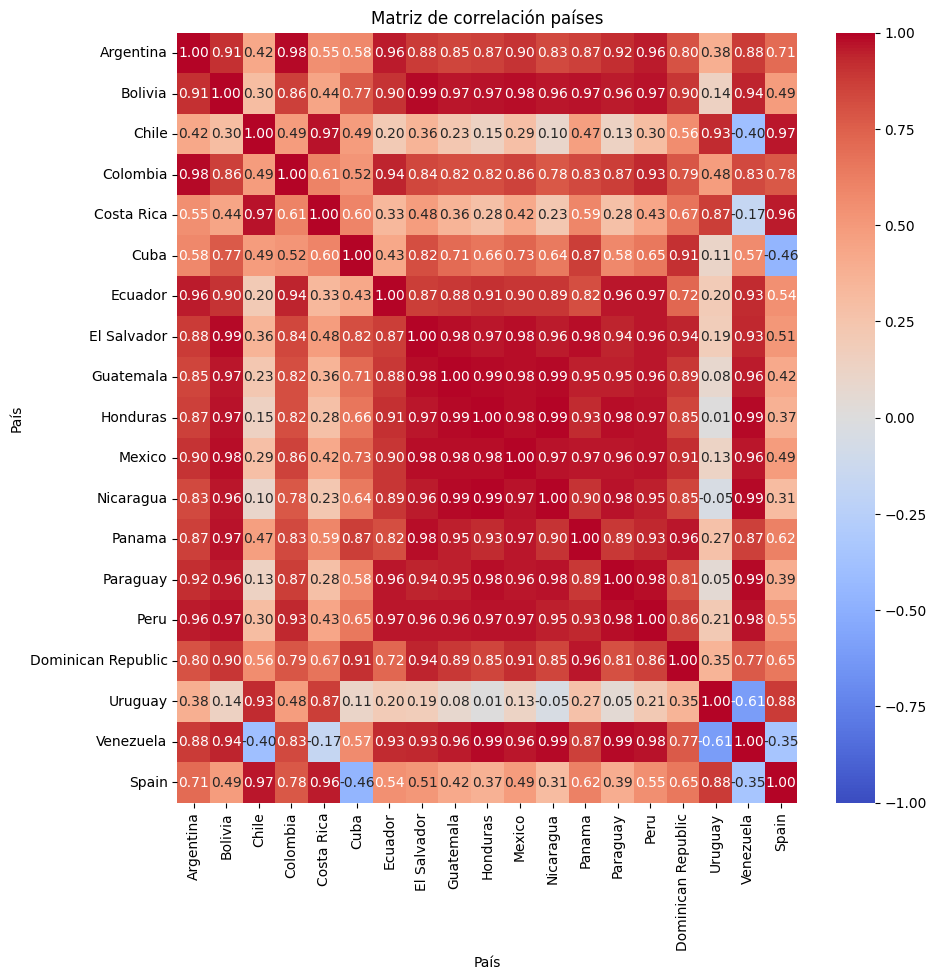

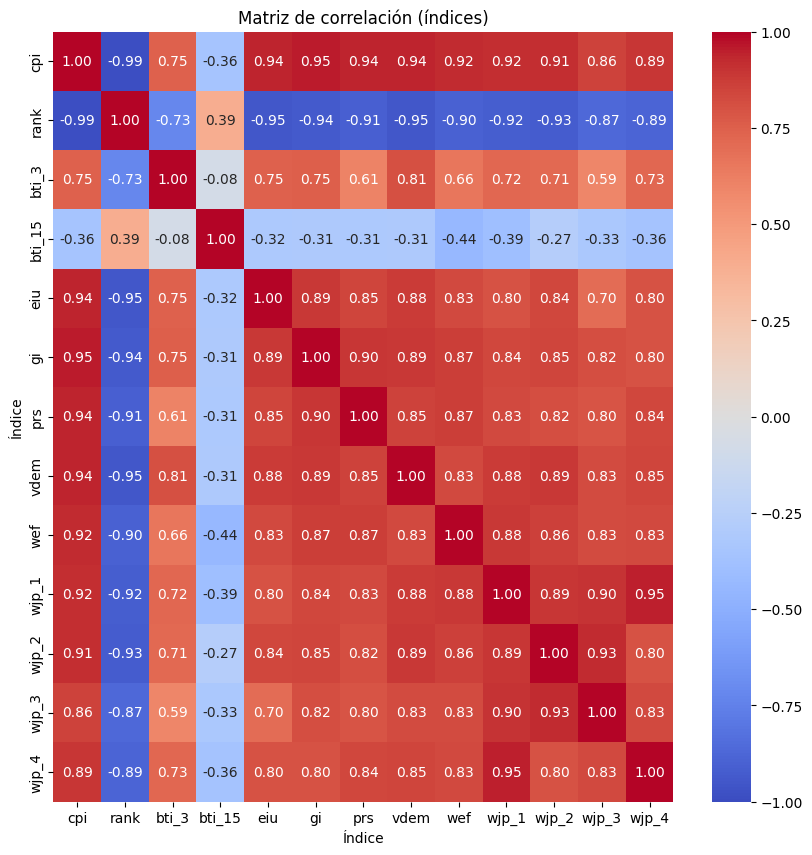

In [31]:
c = df_desglosado.T.corr()

plt.figure(figsize=(10,10))
sns.heatmap(c, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
#sns.heatmap(np.abs(corr), annot=True, cmap="coolwarm", vmin=0, vmax=1, fmt=".1f")
plt.title("Matriz de correlación países")
plt.xlabel("País")
plt.ylabel("País")
plt.show()


cT = df_desglosado.corr()

plt.figure(figsize=(10,10))
#sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
sns.heatmap(cT, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Matriz de correlación (índices)")
plt.xlabel("Índice")
plt.ylabel("Índice")
plt.show()

# Comparacion

In [32]:
def upper_tri_vals(df):
    mask = np.triu(np.ones(df.shape), k=1).astype(bool)
    return df.where(mask).stack()

In [39]:
method = "kendall"  # "spearman" o "kendall"

all_results = []
order = ["Indices-BusquedasComunes (orden)", "Indices-Aleatoria", "Busquedas-Aleatoria", "Indices-Distancia", "Busquedas-Distancia", "Indices-Coincidencias", "Indices-Desglosado", "Indices-BusquedasComunes (pos)"]

for top in [10, 20, 50, 100]:
    tau_order, p, _ = correlation_matrix(resultados, all_hrefs, top, method=method, absent_policy="1.5top", only_common=True, common_by_order=True)
    tau_pos, _, _ = correlation_matrix(resultados, all_hrefs, top, method=method, absent_policy="1.5top", only_common=True, common_by_order=False)

    tras = graph_heatmap(resultados, [0, top], show=False, only_common=True)

    # Obtener variables (paises) comunes
    common_vars = corr.index.intersection(tau_order.index)
    m1 = corr.loc[common_vars, common_vars]
    m2 = tau_order.loc[common_vars, common_vars]
    m5 = tras.loc[common_vars, common_vars]
    m6 = corrDesglosado.loc[common_vars, common_vars]
    m7 = tau_pos.loc[common_vars, common_vars]

    n = len(common_vars)
    rand = np.random.rand(n, n)
    rand = (rand + rand.T) / 2  # simétrica
    np.fill_diagonal(rand, 1.0)
    m3 = pd.DataFrame(rand, index=common_vars, columns=common_vars)

    # vectorizar matrices (solo triangular superior, sin diagonal)
    v1 = upper_tri_vals(m1)
    v2 = upper_tri_vals(m2)
    v3 = upper_tri_vals(m3)
    v4 = upper_tri_vals(dist_matrix.loc[common_vars, common_vars])
    v5 = upper_tri_vals(m5)
    v6 = upper_tri_vals(m6)
    v7 = upper_tri_vals(m7)
    # correlación entre matrices
    r_ib, p_ib = spearmanr(v1, v2)
    r_ir, p_ir = spearmanr(v1, v3)
    r_br, p_br = spearmanr(v2, v3)
    r_id, p_id = spearmanr(v1, v4)
    r_bd, p_bd = spearmanr(v2, v4)
    r_it, p_it = spearmanr(v1, v5)
    r_ides, p_ides = spearmanr(v1, v6)
    r_ipos, p_ipos = spearmanr(v1, v7)

    results = pd.DataFrame({
        "comparacion": order,
        "r": [r_ib, r_ir, r_br, r_id, r_bd, r_it, r_ides, r_ipos],
        "p": [p_ib, p_ir, p_br, p_id, p_bd, p_it, p_ides, p_ipos],
        "top": top
    })
    results = results.round(3)

    all_results.append(results)

    print("=" * 50)
    print(f"Top {top} resultados:")
    print("-" * 50)
    print(results)
    print("=" * 50+'\n')

https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
https://es.wikipedia.org/wiki/Corrupci%C3%B3n_pol%C3%ADtica
https://www.interpol.int/es/Delitos/Corrupcion
https://dle.rae.es/corrupci%C3%B3n
https://www.unodc.org/newsletter/es/200601/page004.html
Common for Bolivia:
	https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
	https://www.interpol.int/es/Delitos/Corrupcion
	https://www.unodc.org/newsletter/es/200601/page004.html
	https://es.wikipedia.org/wiki/Corrupci%C3%B3n_pol%C3%ADtica
	https://dle.rae.es/corrupci%C3%B3n
Common for Spain:
	https://www.unir.net/revista/derecho/que-es-corrupcion/#:~:text=Etimol%C3%B3gicamente%2C%20el%20vocablo%20corrupci%C3%B3n%20proviene,al%20sistema%20social%20o%20a%20las
	https://dle.rae.es/corrupci%C3%B3n
	https://es.wikip

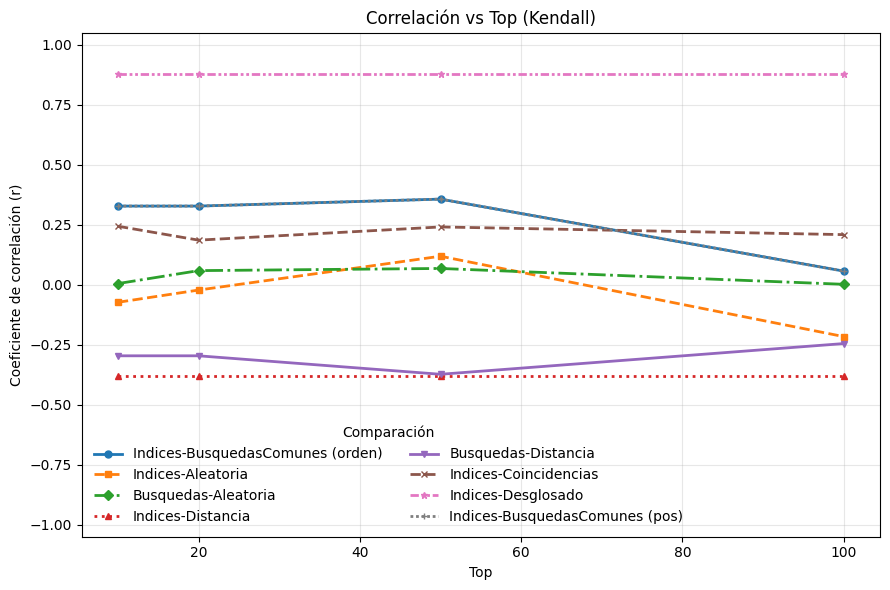

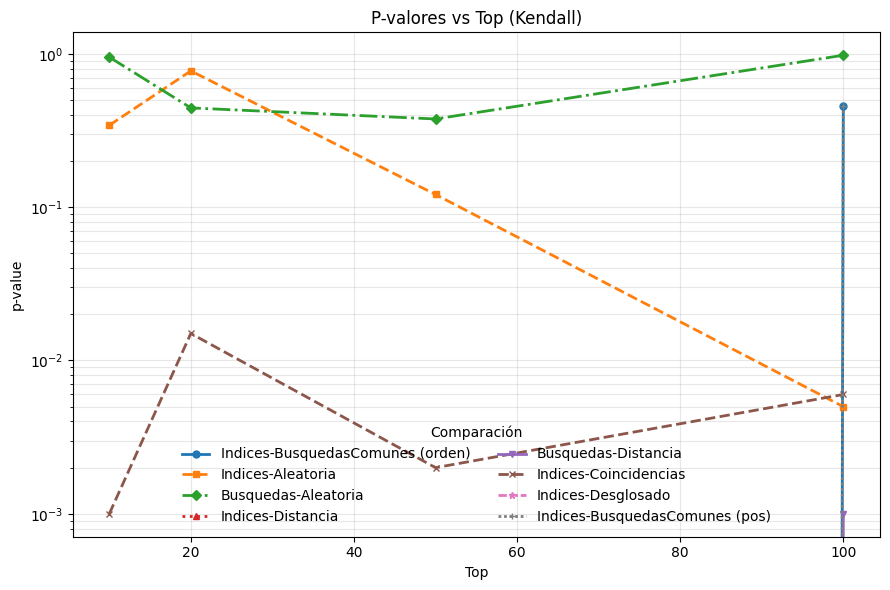

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Combinar resultados de todos los tops
df_all = pd.concat(all_results, ignore_index=True)
df_all["comparacion"] = pd.Categorical(df_all["comparacion"], categories=order, ordered=True)

# Pivot para los coeficientes de correlación (r)
wide_r = df_all.pivot(index="top", columns="comparacion", values="r").sort_index()
# Pivot para los p-values
wide_p = df_all.pivot(index="top", columns="comparacion", values="p").sort_index()

# ---------------------------------------------------------
# 1) GRÁFICA DE CORRELACIONES
# ---------------------------------------------------------
plt.figure(figsize=(9, 6))
markers = ["o", "s", "D", "^", "v", "x", "*", "+"]
linestyles = ["-", "--", "-.", ":", "-", "--", (0, (3,1,1,1,1,1)), (0, (1,1))]

for i, comp in enumerate(order):
    if comp in wide_r.columns:
        plt.plot(
            wide_r.index, wide_r[comp],
            marker=markers[i], linestyle=linestyles[i], linewidth=2, markersize=5,
            label=comp
        )

plt.title(f"Correlación vs Top ({method.title()})")
plt.xlabel("Top")
plt.ylabel("Coeficiente de correlación (r)")
plt.grid(True, alpha=0.3)
plt.legend(title="Comparación", ncol=2, frameon=False)
plt.ylim(-1.05, 1.05)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 2) GRÁFICA DE P-VALUES
# ---------------------------------------------------------
plt.figure(figsize=(9, 6))

for i, comp in enumerate(order):
    if comp in wide_p.columns:
        plt.plot(
            wide_p.index, wide_p[comp],
            marker=markers[i], linestyle=linestyles[i], linewidth=2, markersize=5,
            label=comp
        )

plt.title(f"P-valores vs Top ({method.title()})")
plt.xlabel("Top")
plt.ylabel("p-value")
plt.yscale("log")  # Escala logarítmica para distinguir mejor valores pequeños
plt.grid(True, which="both", alpha=0.3)
plt.legend(title="Comparación", ncol=2, frameon=False)
plt.tight_layout()
plt.show()
